In [11]:
#Step 1: Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation


In [12]:
#Step 2: Import the dataset
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
#Step 3: Now let us convert the pixels into floating-point values
#Step 4: Normalize image pixel values by dividing by 255
gr_scale = 255.0  # Ensure gr_scale is a float
x_tr = x_tr.astype('float64') / gr_scale
x_te = x_te.astype('float64') / gr_scale


We have converted the pixel values into floating point values to make the predictions. Converting the values into ‘grayscale’ values will be advantageous as the values become small-scaled and the calculations become simpler. The pixel values range from ‘0 to 256’, apart from ‘0’ the range is ‘255’. We will divide all the pixel values by ‘255’ and convert it into the range from ‘0 to 1’.

In [21]:
#Step 5: Explore data
print("Feature Matrix Size", x_tr.shape)
print("Target Matrix Size", x_te.shape)
print("Feature Matrix Size", y_tr.shape)
print("Target Matrix Size", y_te.shape)

Feature Matrix Size (60000, 28, 28)
Target Matrix Size (10000, 28, 28)
Feature Matrix Size (60000,)
Target Matrix Size (10000,)


From the above code and output, we understand that we have 60,000 values of record in the training dataset and 10,000 values of record in the test dataset. All the images present in the dataset are of the size ‘28×2

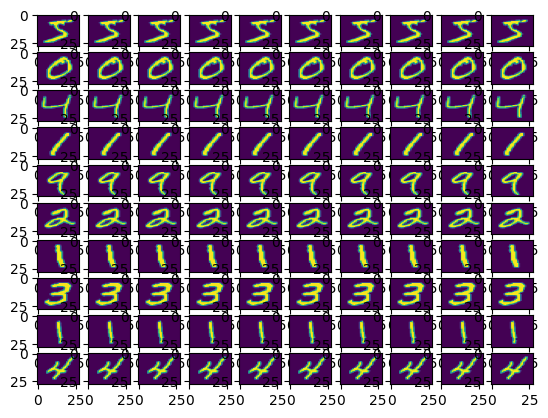

In [24]:
#Step 6: Visualizing the data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):  
    for j in range(10):    
        ax[i][j].imshow(x_tr[k].reshape(28, 28),  
                    aspect='auto')
    k += 1
plt.show()

In [25]:
#Step 7: Forming the Input layer, hidden layer, and output layers
Main_model = Sequential([    
Flatten(input_shape=(28, 28)),   
Dense(256, activation='sigmoid'),     
Dense(128, activation='sigmoid'),  
 Dense(10, activation='sigmoid'),  
])

c:\Users\badar\Desktop\VS Studio\Deep Learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Important points to understand here:
1. The ‘Sequential’ model acknowledges us to create models layer by layer as we require in an MLP.
2. It is limited to single-input, single-output stacks of layers.
3. ‘Flatten’ is used to compress the input values provided without influencing the batch size.
4. Activation’ is used for applying the sigmoid activation function.
5. The first two ‘Dense’ layers are utilized to form a fully connected model.
6. The ‘last Dense layer’ is the final output layer which contains 10 nodes. These ten neurons decide which category the image belongs to.

In [27]:
#Step 8: Compilation of the model
Main_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Important points to understand here:
Epochs show the number of times the model will be trained via forward and backward propagation.
Batch Size shows us the number of samples formed to train the dataset.
If you do not specify it explicitly then the batch_size default value will be set to 32.

In [29]:
Final_result = Main_model.evaluate(x_te,  y_te, verbose = 0)

print(Final_result)

RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.